In [1]:
import numpy as np
from os import listdir
from os import path
import json
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle

In [2]:
from learn import *
import utils

Task number: 298
Number of train examples 2
0
     input shapes [(6, 6), (6, 6)]
     output shapes [(6, 6), (6, 6)]


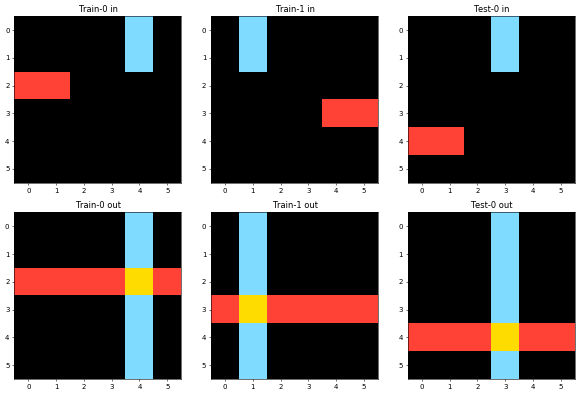

In [3]:
tr, te, ev = utils.get_data()
t = Task(298, tr[298])
t.summary()
t.plot()

In [4]:
IM = t.train[0].input

In [5]:
IM + 2

array([[2, 2, 2, 2, 10, 2],
       [2, 2, 2, 2, 10, 2],
       [4, 4, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2]], dtype=object)

In [6]:
IM.m

array([[0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 8, 0],
       [2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=object)

In [7]:
cell = IM[0][0].copy()
shape = np.shape(IM)
shape = (2, 8)
shape

(2, 8)

In [8]:
cx, cy, cv = cell.x, cell.y, cell.v
def xy_matrices(shape):
    y,x = shape
    f = lambda a, b: np.repeat(np.arange(a), b).reshape((a,b))
    return f(y, x), f(x, y).T

ym, xm = xy_matrices(shape)
xm

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

In [9]:
# To get dist at specific index
i = 5
cell_dist_x_mat = abs(abs(xm.copy() - shape[1] / 2) - shape[1]/2) 
np.roll(cell_dist_x_mat, i)

array([[3., 4., 3., 2., 1., 0., 1., 2.],
       [3., 4., 3., 2., 1., 0., 1., 2.]])

In [10]:
Cell(2, 4, 0)

0

In [11]:
def xy_maps(y, x):
    f = lambda a, b: np.repeat(np.arange(a), b).reshape((a, b))
    return f(y, x), f(x, y).T.copy()

In [12]:
y, x = 7, 5
ys, xs = 1, 3
ym, xm = xy_maps(y, x)

In [13]:
xm

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [14]:
ym

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6]])

In [15]:
def xy_diffs(ym, xm):
    # TODO axis why
    df = lambda m, s, i, a: np.roll(abs(abs(m - s // 2) - s / 2), i, axis=a)
    return df(ym, y, ys, 0), df(xm, x, xs, 1) #t comes for shift type

In [16]:
dym, dxm = xy_diffs(ym, xm)

In [31]:
from math import ceil

In [36]:
ysh, xsh = np.shape(IM)
ysh

6

In [74]:
from feature_calc import FeatureCalculator
from itertools import product

features = []

for y, x in product(range(ysh), range(xsh)):
    c = IM[y][x]
    fc = FeatureCalculator(c.y, c.x, c.v, IM)
    features.append(fc.features().T)
#     print(y,x)
#     features[y,x] = fc.features()

f = np.array(features)
f = np.reshape(f, (ysh, xsh, *f.shape[1:]))
f.shape

(6, 6, 6, 6, 9)

In [75]:
f[0,0]

array([[[0, 0, True, False, False, 0, 0, 0, 0],
        [1, 0, True, False, False, 0, 0, 0, 0],
        [2, 0, False, False, True, 0, 2, 2, 2],
        [3, 0, True, False, False, 0, 0, 0, 0],
        [2, 0, True, False, False, 0, 0, 0, 0],
        [1, 0, True, False, False, 0, 0, 0, 0]],

       [[0, 1, True, False, False, 0, 0, 0, 0],
        [1, 1, True, False, False, 0, 0, 0, 0],
        [2, 1, False, False, True, 0, 2, 2, 2],
        [3, 1, True, False, False, 0, 0, 0, 0],
        [2, 1, True, False, False, 0, 0, 0, 0],
        [1, 1, True, False, False, 0, 0, 0, 0]],

       [[0, 2, True, False, False, 0, 0, 0, 0],
        [1, 2, True, False, False, 0, 0, 0, 0],
        [2, 2, True, False, False, 0, 0, 0, 0],
        [3, 2, True, False, False, 0, 0, 0, 0],
        [2, 2, True, False, False, 0, 0, 0, 0],
        [1, 2, True, False, False, 0, 0, 0, 0]],

       [[0, 3, True, False, False, 0, 0, 0, 0],
        [1, 3, True, False, False, 0, 0, 0, 0],
        [2, 3, True, False, False,

In [30]:
fc.v

2